In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option("display.max_rows", 15)

In [3]:
iris = load_iris()
iris

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 4.6,  3.4,  1.4,  0.3],
        [ 5. ,  3.4,  1.5,  0.2],
        [ 4.4,  2.9,  1.4,  0.2],
        [ 4.9,  3.1,  1.5,  0.1],
        [ 5.4,  3.7,  1.5,  0.2],
        [ 4.8,  3.4,  1.6,  0.2],
        [ 4.8,  3. ,  1.4,  0.1],
        [ 4.3,  3. ,  1.1,  0.1],
        [ 5.8,  4. ,  1.2,  0.2],
        [ 5.7,  4.4,  1.5,  0.4],
        [ 5.4,  3.9,  1.3,  0.4],
        [ 5.1,  3.5,  1.4,  0.3],
        [ 5.7,  3.8,  1.7,  0.3],
        [ 5.1,  3.8,  1.5,  0.3],
        [ 5.4,  3.4,  1.7,  0.2],
        [ 5.1,  3.7,  1.5,  0.4],
        [ 4.6,  3.6,  1. ,  0.2],
        [ 5.1,  3.3,  1.7,  0.5],
        [ 4.8,  3.4,  1.9,  0.2],
        [ 5. ,  3. ,  1.6,  0.2],
        [ 5. ,  3.4,  1.6,  0.4],
        [ 5.2,  3.5,  1.5,  0.2],
        [ 5.2,  3.4,  1.4,  0.2],
      

In [4]:
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2


In [5]:
df = df.drop(["sepal width (cm)", "petal width (cm)"], axis=1)
df

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
...,...,...,...
143,6.8,5.9,2
144,6.7,5.7,2


In [6]:
from sklearn.model_selection import train_test_split
data = df.drop(["target"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(data, df["target"], test_size=0.1)

In [7]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf = clf.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [8]:
from sklearn.metrics import accuracy_score
predict = clf.predict(x_test)
print("預測:", list(predict))
print("正確標籤:", list(y_test))
print("正確率:", accuracy_score(y_test, predict)*100, "%")

預測: [0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0]
正確標籤: [0, 2, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0]
正確率: 80.0 %


使用感知器分類器畫出決策邊界

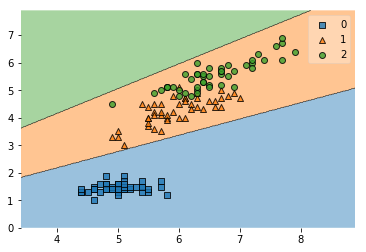

In [9]:
#!pip install mlxtend
from mlxtend.plotting import plot_decision_regions
import numpy as np
plot_decision_regions(X=np.array(x_train), y=np.array(y_train), clf=clf)

使用單純貝氏擬合非線性的決策邊界

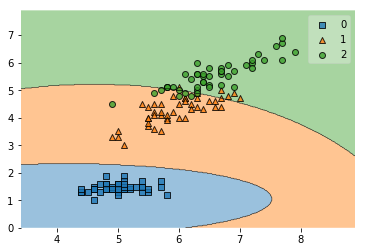

In [10]:
# 由於特徵不是不連續的整數, 所以必須使用 GaussianNB
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf = clf.fit(x_train, y_train)
plot_decision_regions(X=np.array(x_train), y=np.array(y_train), clf=clf)

使用決策樹擬合非線性的決策邊界

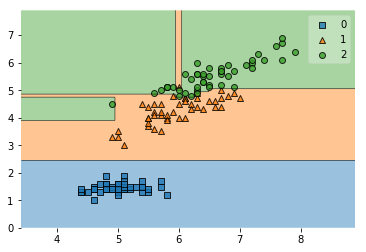

In [18]:
from sklearn.tree import DecisionTreeClassifier
# 可以試試看從 max_depth = 1 慢慢往上調整,觀看決策邊界的變化
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
plot_decision_regions(X=np.array(x_train), y=np.array(y_train), clf=clf)

感知器無法處理 XOR 問題

In [19]:
from numpy import random
# 可以用 numpy 快速產生隨機, 第一個參數是產生有多少種類
# 第二個參數是要幾個
# x1 是第一特徵, 你可以想像成帥
# x2 是第二特徵, 你可以想像成有才華
x1 = random.choice([True, False], 100)
x2 = random.choice([True, False], 100)
# y 是 target, 你可以想像成會不會喜歡
y = np.logical_xor(x1, x2)
df = pd.DataFrame(columns = ["x1", "x2", "y"])
df["x1"] = x1
df["x2"] = x2
df["y"] = y
df = df.astype(int)
df

,x1,x2,y
0,0,0,0
1,1,0,1
2,0,1,1
3,0,1,1
4,0,1,1
5,0,1,1
6,1,1,0
...,...,...,...
93,0,1,1
94,0,1,1
